In [1]:
import sys
sys.path.insert(0, '..')
#for local import of parent dict

## Import the usual libraries
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets, models, transforms

from ggml import ggml
import scipy

import os
import numpy as np

#synth Data
from ggml.data import SyntheticDataset
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

#Optimal Transport
import ot

#Plotting
from ggml.plot import plot_distribution, plot_emb, hier_clustering, plot_ellipses
import matplotlib.pyplot as plt
import seaborn as sns


4.867603162525632e-15


/home/kuehn/anaconda3/envs/ggml/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#Parameter for GGML
#Can be tuned with provided hyperparameter tuning script
alpha = 10
lambda_ = 0.1

neighbor_t = 3 
rank_k = 5 

lr = 0.02
norm = 1

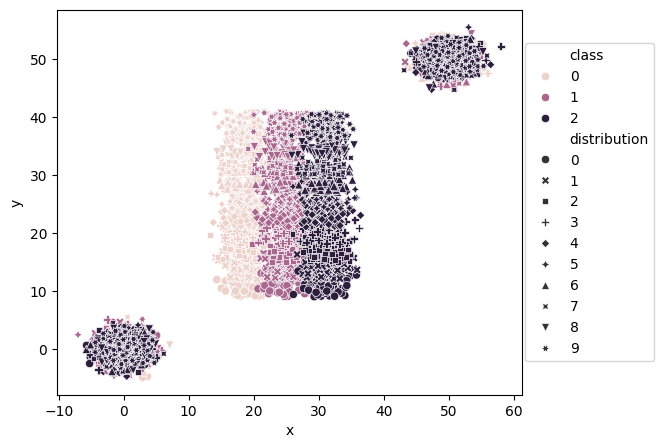

passed neighs: 3


In [3]:
#Number of element sampled 
n = 100

#Length of list defines number of classes
means = [5,10,15]
label =[0,1,2]

#Length of list defines number of distributions in each class
offsets = np.arange(0,30,3)+1.5

#Lnegth of list defines number of modes that can not be differentiated between classes
shared_means_x = [0, 40]
shared_means_y = [0, 50]

noise_scale = 1
noise_dims = 199

data = SyntheticDataset(distribution_size=n, class_means = means, offsets = offsets, shared_means_x=shared_means_x, shared_means_y=shared_means_y, plot=True, varying_size=False,t=neighbor_t,noise_scale=noise_scale,noise_dims=noise_dims)#noise_scale=1,noise_dims=199)

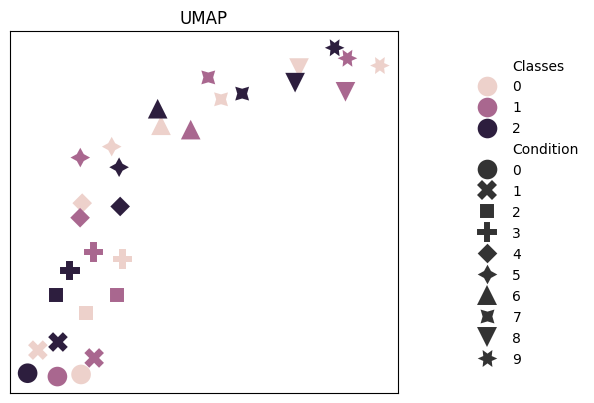

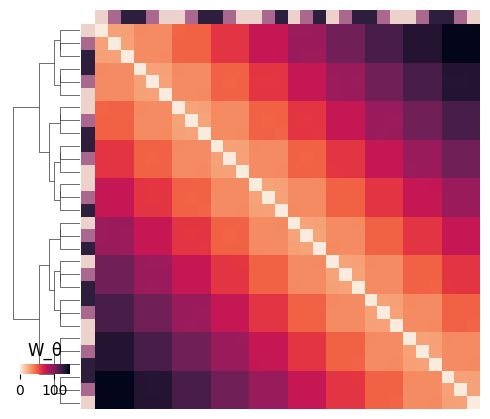

In [4]:
mahalanobis_matrix_euclidean = np.identity(noise_dims+1)
D_eucl = data.compute_OT_on_dists(w = mahalanobis_matrix_euclidean)

Feature batch shape: torch.Size([128, 3, 300, 200])
Labels batch shape: torch.Size([128, 3])


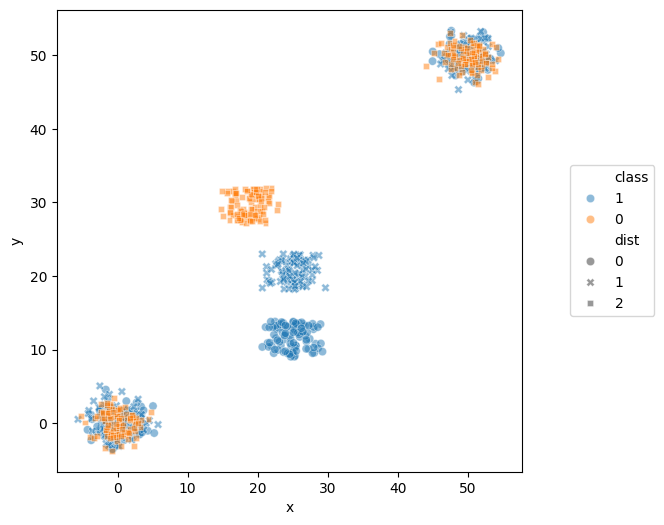

Example Triplet with Labels: [1.0, 1.0, 0.0]


In [5]:
training_dataset = DataLoader(data , batch_size=128, shuffle=True) 

train_features, train_labels = next(iter(training_dataset))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

trpl_distributions = train_features[0]
trpl_label = train_labels[0]
plot_distribution(trpl_distributions[:,:,:2],np.asarray(trpl_label,dtype=int))

plt.show()
print(f"Example Triplet with Labels: {[l.item() for l in trpl_label]}")


Running GGML with alpha: 10, lambda: 0.1, rank: 5


100%|██████████| 5/5 [02:21<00:00, 28.31s/it]


Iteration 1 with Loss  86.6104507446289


100%|██████████| 5/5 [01:28<00:00, 17.76s/it]


Iteration 2 with Loss  54.12271499633789


100%|██████████| 5/5 [01:25<00:00, 17.08s/it]


Iteration 3 with Loss  52.76307678222656


100%|██████████| 5/5 [01:26<00:00, 17.23s/it]


Iteration 4 with Loss  54.62260437011719


100%|██████████| 5/5 [01:25<00:00, 17.10s/it]


Iteration 5 with Loss  48.47296142578125


100%|██████████| 5/5 [01:24<00:00, 16.93s/it]


Iteration 6 with Loss  47.98915481567383


100%|██████████| 5/5 [01:24<00:00, 16.95s/it]


Iteration 7 with Loss  48.94329071044922


100%|██████████| 5/5 [01:25<00:00, 17.03s/it]


Iteration 8 with Loss  50.11680221557617


100%|██████████| 5/5 [01:25<00:00, 17.15s/it]


Iteration 9 with Loss  50.78828048706055


100%|██████████| 5/5 [01:25<00:00, 17.14s/it]


Iteration 10 with Loss  48.23725891113281
Compute all OT distances after 10 iterations


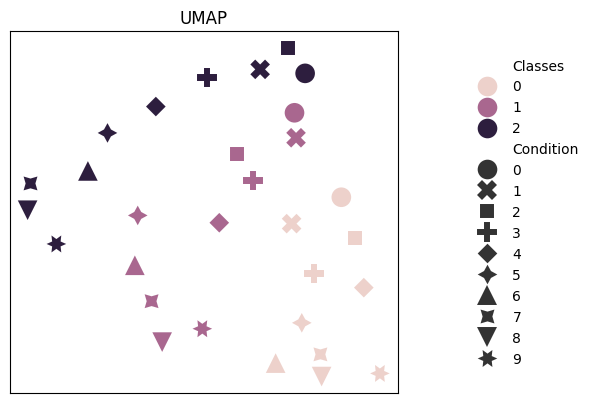

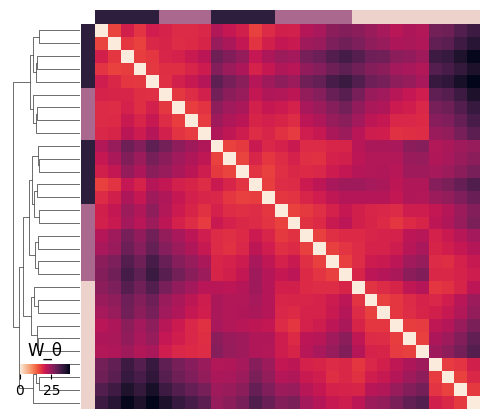

100%|██████████| 5/5 [01:27<00:00, 17.51s/it]


Iteration 11 with Loss  52.73341751098633


100%|██████████| 5/5 [01:30<00:00, 18.02s/it]


Iteration 12 with Loss  47.74687194824219


100%|██████████| 5/5 [01:29<00:00, 17.94s/it]


Iteration 13 with Loss  50.37033462524414


100%|██████████| 5/5 [01:27<00:00, 17.45s/it]


Iteration 14 with Loss  33.994239807128906


100%|██████████| 5/5 [01:26<00:00, 17.35s/it]


Iteration 15 with Loss  45.47865295410156


100%|██████████| 5/5 [01:25<00:00, 17.15s/it]


Iteration 16 with Loss  47.651851654052734


100%|██████████| 5/5 [01:25<00:00, 17.17s/it]


Iteration 17 with Loss  44.08469009399414


100%|██████████| 5/5 [01:29<00:00, 17.97s/it]


Iteration 18 with Loss  51.73223876953125


100%|██████████| 5/5 [01:32<00:00, 18.45s/it]


Iteration 19 with Loss  44.51422882080078


100%|██████████| 5/5 [01:33<00:00, 18.80s/it]


Iteration 20 with Loss  47.18352508544922
Compute all OT distances after 20 iterations


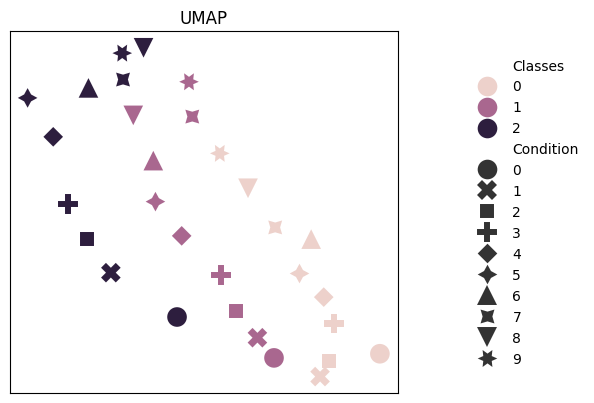

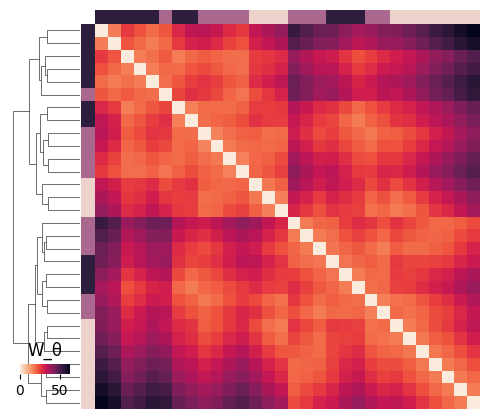

100%|██████████| 5/5 [01:36<00:00, 19.37s/it]


Iteration 21 with Loss  45.954917907714844


100%|██████████| 5/5 [01:32<00:00, 18.57s/it]


Iteration 22 with Loss  42.727359771728516


100%|██████████| 5/5 [01:36<00:00, 19.38s/it]


Iteration 23 with Loss  56.455989837646484


100%|██████████| 5/5 [01:29<00:00, 17.89s/it]


Iteration 24 with Loss  45.74964904785156


100%|██████████| 5/5 [01:26<00:00, 17.30s/it]


Iteration 25 with Loss  37.708473205566406


100%|██████████| 5/5 [01:33<00:00, 18.79s/it]


Iteration 26 with Loss  49.584197998046875


100%|██████████| 5/5 [01:30<00:00, 18.00s/it]


Iteration 27 with Loss  40.6295051574707


100%|██████████| 5/5 [01:36<00:00, 19.35s/it]


Iteration 28 with Loss  44.19688415527344


100%|██████████| 5/5 [01:36<00:00, 19.23s/it]


Iteration 29 with Loss  44.45211410522461


100%|██████████| 5/5 [01:36<00:00, 19.28s/it]


Iteration 30 with Loss  39.26329040527344
Compute all OT distances after 30 iterations


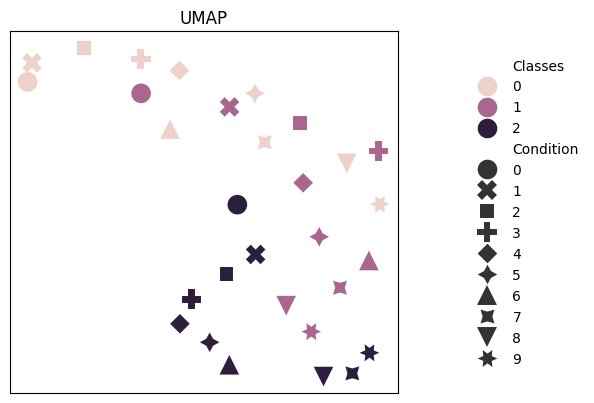

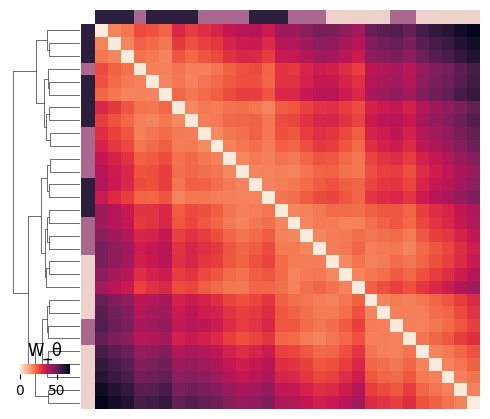

100%|██████████| 5/5 [01:32<00:00, 18.58s/it]


Iteration 31 with Loss  40.52585983276367


100%|██████████| 5/5 [01:32<00:00, 18.54s/it]


Iteration 32 with Loss  36.2304573059082


100%|██████████| 5/5 [01:34<00:00, 18.84s/it]


Iteration 33 with Loss  40.003135681152344


100%|██████████| 5/5 [01:34<00:00, 18.93s/it]


Iteration 34 with Loss  35.28815841674805


100%|██████████| 5/5 [01:33<00:00, 18.70s/it]


Iteration 35 with Loss  38.890743255615234


100%|██████████| 5/5 [01:31<00:00, 18.33s/it]


Iteration 36 with Loss  33.83629608154297


100%|██████████| 5/5 [01:30<00:00, 18.01s/it]


Iteration 37 with Loss  33.10744857788086


100%|██████████| 5/5 [01:31<00:00, 18.26s/it]


Iteration 38 with Loss  32.20708084106445


100%|██████████| 5/5 [01:28<00:00, 17.66s/it]


Iteration 39 with Loss  35.18877029418945


100%|██████████| 5/5 [01:27<00:00, 17.56s/it]


Iteration 40 with Loss  32.80980682373047
Compute all OT distances after 40 iterations


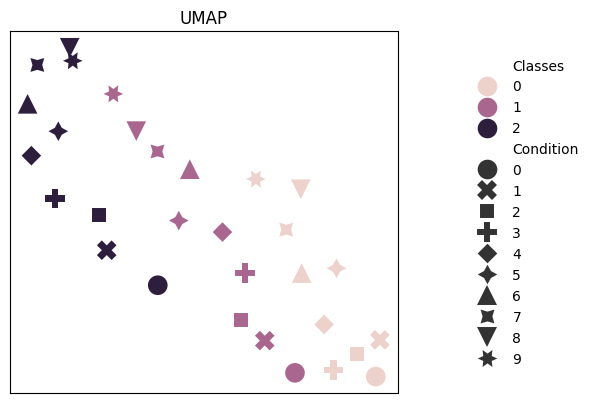

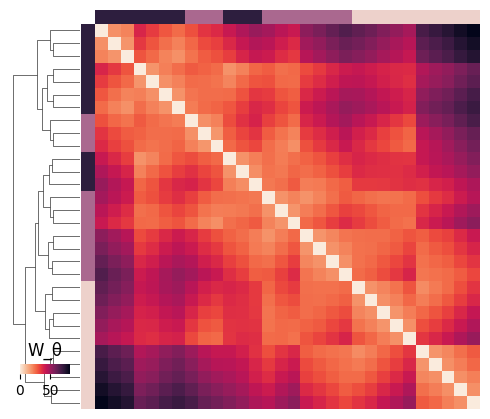

100%|██████████| 5/5 [02:20<00:00, 28.13s/it]


Iteration 41 with Loss  29.734987258911133


100%|██████████| 5/5 [02:36<00:00, 31.39s/it]


Iteration 42 with Loss  34.641502380371094


100%|██████████| 5/5 [02:52<00:00, 34.42s/it]


Iteration 43 with Loss  34.69318389892578


100%|██████████| 5/5 [02:51<00:00, 34.31s/it]


Iteration 44 with Loss  29.740835189819336


100%|██████████| 5/5 [02:52<00:00, 34.57s/it]


Iteration 45 with Loss  28.69472885131836


100%|██████████| 5/5 [02:58<00:00, 35.64s/it]


Iteration 46 with Loss  29.98029136657715


100%|██████████| 5/5 [02:55<00:00, 35.04s/it]


Iteration 47 with Loss  30.343839645385742


100%|██████████| 5/5 [02:55<00:00, 35.16s/it]


Iteration 48 with Loss  28.538785934448242


100%|██████████| 5/5 [02:56<00:00, 35.35s/it]


Iteration 49 with Loss  32.57347106933594


100%|██████████| 5/5 [02:59<00:00, 35.96s/it]


Iteration 50 with Loss  29.992023468017578
Compute all OT distances after 50 iterations


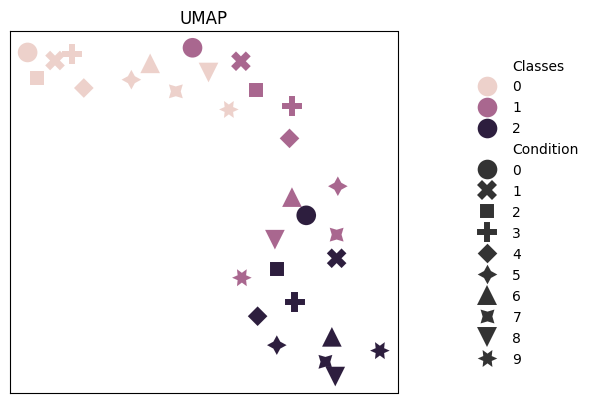

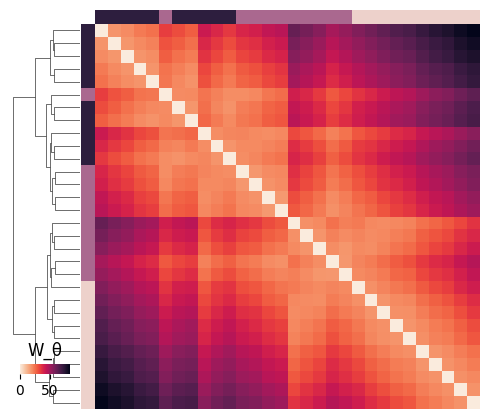

In [6]:
w_theta = ggml(training_dataset,a=alpha,l=lambda_,k=rank_k,lr=lr,norm=norm,max_iterations=30,plot_i_iterations=10,dataset=data,n_threads=64)

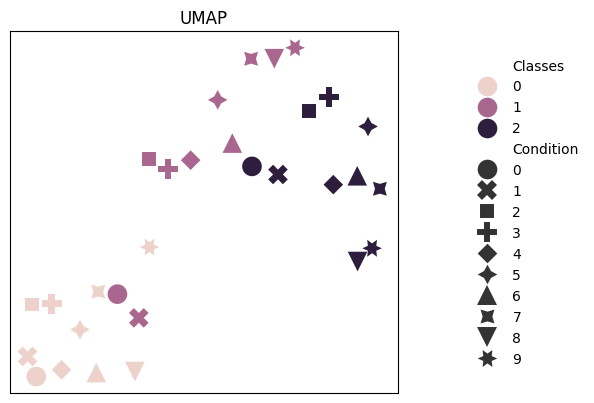

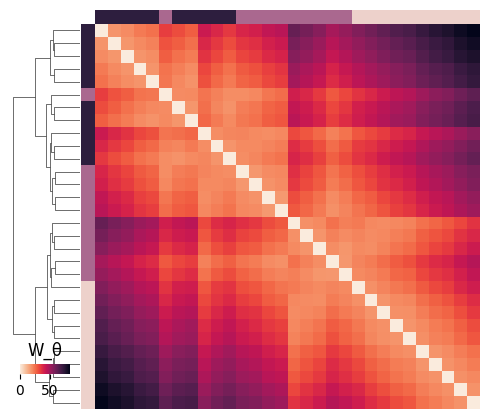

In [7]:
D_ggml = data.compute_OT_on_dists(w = w_theta)

Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


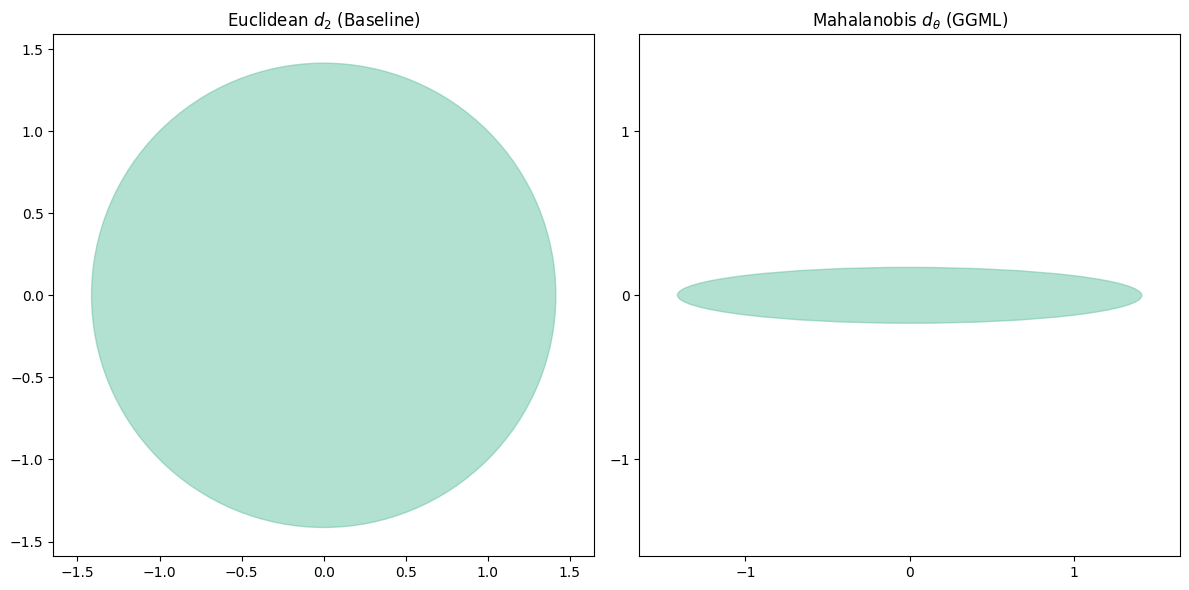

In [16]:
from ggml.plot import plot_ellipses
np.set_printoptions(suppress=True,precision=16)
#w_theta = w_theta.clone().detach().numpy()

fig, axs = plt.subplots(ncols=2, figsize=(12,6))


#fig, ax = plt.subplots(figsize=(3,3))
ax = plot_ellipses(np.identity(2), ax=axs[0])
print(ax)
ax.set_title(r'Euclidean $d_2$ (Baseline)')

m = np.transpose(w_theta) @ w_theta 
m = m / np.max(m)
ax = plot_ellipses(m[:2,:2], ax=axs[1])
print(ax)
ax.set_title(r'Mahalanobis $d_\theta$ (GGML)')
#ax.get_figure().set_size_inches(2.4,5)


plt.tight_layout()
plt.show()



